In [10]:
import tensorflow as tf

In [11]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#read all file
all_files_path=glob('dataverse_files/*.edf')
print(len(all_files_path))

28


In [13]:
all_files_path[0]


'dataverse_files\\h01.edf'

In [14]:
healthy_file_path=[i for i in all_files_path if  'h' in i.split('\\')[1]]
patient_file_path=[i for i in all_files_path if  's' in i.split('\\')[1]]

In [15]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [16]:
data=read_data(healthy_file_path[0])


Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


In [17]:
data.shape


(37, 19, 6250)

In [18]:
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]


Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 44 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 224999  =      0.000 ...   899.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241249  =      0.000 ...   964.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216249  =      0.000 ...   864.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s08.edf...
EDF file detected
Setting channel info structure...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished


Creating raw.info structure...
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 54 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.6s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\DELL\Final year\dataverse_files\s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 86 events and 6250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.8s finished


In [20]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))


14 14


In [21]:
data_list=control_epochs_array+patients_epochs_array
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))


28 28


In [22]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]


In [23]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape,group_array.shape)

(1142, 6250, 19) (1142,) (1142,)


In [24]:
# from sklearn.model_selection import GroupKFold
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.backend import clear_session

# class KFoldCNNModel:
#     def __init__(self, num_splits, epochs_per_fold):
#         self.num_splits = num_splits
#         self.epochs_per_fold = epochs_per_fold
#         self.model = self.cnnmodel()
#         self.accuracy = []

#     def cnnmodel(self):
#         clear_session()
#         model = Sequential()
#         model.add(Conv1D(filters=5, kernel_size=2, strides=1, input_shape=(6250, 19)))
#         model.add(BatchNormalization())
#         model.add(LeakyReLU())
#         model.add(MaxPool1D(pool_size=2, strides=1))
#         model.add(Conv1D(filters=5, kernel_size=2, strides=1))
#         model.add(LeakyReLU())
#         model.add(MaxPool1D(pool_size=2, strides=1))
#         model.add(Dropout(0.3))
#         model.add(Conv1D(filters=5, kernel_size=2, strides=1))
#         model.add(LeakyReLU())
#         model.add(AveragePooling1D(pool_size=2, strides=1))
#         model.add(Dropout(0.2))
#         model.add(GlobalAveragePooling1D())
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
#         return model

#     def train_and_evaluate(self, train_index, val_index, data_array, label_array):
#         train_features, train_labels = data_array[train_index], label_array[train_index]
#         val_features, val_labels = data_array[val_index], label_array[val_index]
#         scaler = StandardScaler()
#         train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
#         val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
#         self.model.fit(train_features, train_labels, epochs=self.epochs_per_fold, batch_size=96, validation_data=(val_features, val_labels))
#         self.accuracy.append(self.model.evaluate(val_features, val_labels)[1])

#     def run_cross_validation(self, data_array, label_array, groups):
#         gkf = GroupKFold(n_splits=self.num_splits)
#         for train_index, val_index in gkf.split(data_array, label_array, groups=groups):
#             self.train_and_evaluate(train_index, val_index, data_array, label_array)

# if __name__ == "__main__":
    
#     data_array=np.vstack(data_list)
#     label_array=np.hstack(label_list)
#     group_array=np.hstack(groups_list)
#     data_array=np.moveaxis(data_array,1,2)

#     kfold_cnn_model = KFoldCNNModel(num_splits=0.6, epochs_per_fold=45)
#     kfold_cnn_model.run_cross_validation(data_array, label_array, group_array)
#     accuracy = kfold_cnn_model.accuracy


In [65]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session



def cnnmodel():
    clear_session()

    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=2,strides=1,input_shape=(6250,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=1))#2
    model.add(Conv1D(filters=5,kernel_size=2,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=1))#4
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=5,kernel_size=2,strides=1))#5
    model.add(LeakyReLU())
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=1))#6
    model.add(Dropout(0.2))
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11
    
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6249, 5)           195       
                                                                 
 batch_normalization (Batch  (None, 6249, 5)           20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6249, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 6248, 5)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6247, 5)           55        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6247, 5)           0

In [ ]:
# from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
# from sklearn.preprocessing import StandardScaler
# gkf=GroupKFold()

In [67]:

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf = GroupKFold(n_splits=2) 
accuracy = []

model = cnnmodel()

for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    history=model.fit(train_features, train_labels, epochs=45, batch_size=96, validation_data=(val_features,val_labels))

    accuracy.append(history.history['accuracy'])



Epoch 1/45
6/6 [==============================] - 11s 1s/step - loss: 0.6528 - accuracy: 0.6106 - val_loss: 0.6845 - val_accuracy: 0.4870
Epoch 2/45
6/6 [==============================] - 4s 666ms/step - loss: 0.6499 - accuracy: 0.6106 - val_loss: 0.6882 - val_accuracy: 0.4870
Epoch 3/45
6/6 [==============================] - 4s 706ms/step - loss: 0.6401 - accuracy: 0.6106 - val_loss: 0.6904 - val_accuracy: 0.4870
Epoch 4/45
6/6 [==============================] - 4s 773ms/step - loss: 0.6334 - accuracy: 0.6106 - val_loss: 0.6934 - val_accuracy: 0.4870
Epoch 5/45
6/6 [==============================] - 5s 863ms/step - loss: 0.6334 - accuracy: 0.6106 - val_loss: 0.6931 - val_accuracy: 0.4870
Epoch 6/45
6/6 [==============================] - 4s 743ms/step - loss: 0.6323 - accuracy: 0.6106 - val_loss: 0.6916 - val_accuracy: 0.4870
Epoch 7/45
6/6 [==============================] - 4s 755ms/step - loss: 0.6189 - accuracy: 0.6106 - val_loss: 0.6855 - val_accuracy: 0.4870
Epoch 8/45
6/6 [======

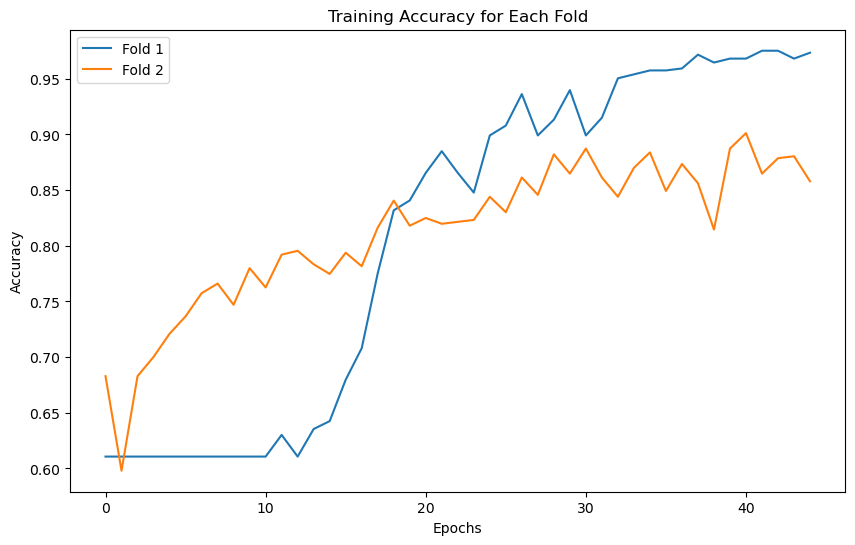

In [68]:
# Plot the training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(accuracy)):
    plt.plot(accuracy[i], label=f'Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Each Fold')
plt.legend()
plt.show()

In [19]:
a=model.evaluate(val_features, val_labels)
print(a)


8/8 [==============================] - 1s 64ms/step - loss: 0.5281 - accuracy: 0.6128
[0.5281120538711548, 0.6127659678459167]


In [69]:
# from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
# GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.backend import clear_session
# def rnnmodel():
#     model = tf.keras.Sequential([
#     tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True),
#     tf.keras.layers.Dense(1)  # Output layer for regression
# ])

    
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

# model=rnnmodel()
# model.summary()

from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def rnnmodel():
    model_r = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=((6250,19)), dropout=0.2),
        # tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, dropout=0.2),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])

    model_r.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_r = rnnmodel()
model_r.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6249, 5)           195       
                                                                 
 batch_normalization (Batch  (None, 6249, 5)           20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6249, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 6248, 5)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 6247, 5)           55        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6247, 5)           0

In [74]:
accuracy=[]

# model=rnnmodel()

for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    
    train_features,train_labels=data_array[train_index],label_array[train_index]
    val_features,val_labels=data_array[val_index],label_array[val_index]
    
    scaler=StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    model_r=rnnmodel()
    

    history=model_r.fit(train_features,train_labels,epochs=45,batch_size=96,validation_data=(val_features,val_labels))
    accuracy.append(history.history['accuracy'])

Epoch 1/45
6/6 [==============================] - 6s 1s/step - loss: 0.3010 - accuracy: 0.8867 - val_loss: 0.3342 - val_accuracy: 0.8388
Epoch 2/45
6/6 [==============================] - 5s 826ms/step - loss: 0.2489 - accuracy: 0.9186 - val_loss: 0.4101 - val_accuracy: 0.7938
Epoch 3/45
6/6 [==============================] - 5s 879ms/step - loss: 0.1643 - accuracy: 0.9699 - val_loss: 0.4271 - val_accuracy: 0.7990
Epoch 4/45
6/6 [==============================] - 5s 818ms/step - loss: 0.1816 - accuracy: 0.9575 - val_loss: 0.4069 - val_accuracy: 0.8059
Epoch 5/45
6/6 [==============================] - 4s 754ms/step - loss: 0.1778 - accuracy: 0.9593 - val_loss: 0.4153 - val_accuracy: 0.8059
Epoch 6/45
6/6 [==============================] - 5s 853ms/step - loss: 0.1485 - accuracy: 0.9770 - val_loss: 0.4319 - val_accuracy: 0.8007
Epoch 7/45
6/6 [==============================] - 5s 850ms/step - loss: 0.1342 - accuracy: 0.9858 - val_loss: 0.4693 - val_accuracy: 0.7886
Epoch 8/45
6/6 [=======

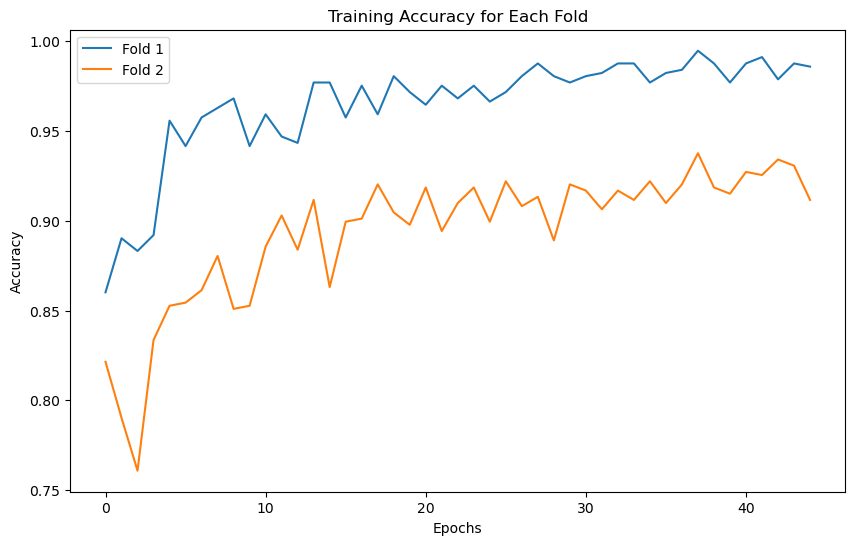

In [71]:
# Plot the training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(accuracy)):
    plt.plot(accuracy[i], label=f'Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Each Fold')
plt.legend()
plt.show()

In [75]:
b=model_r.evaluate(val_features,val_labels)
print(b)

18/18 [==============================] - 1s 65ms/step - loss: 0.2020 - accuracy: 0.9593
[0.20200112462043762, 0.9592920541763306]


In [25]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
def resenetmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(6250,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11
    
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model= resenetmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6248, 5)           290       
                                                                 
 batch_normalization (Batch  (None, 6248, 5)           20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6248, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 3124, 5)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3122, 5)           80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3122, 5)           0

In [58]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf = GroupKFold(n_splits=2) 
accuracy = []

model = resenetmodel()

for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
    history = model.fit(train_features, train_labels, epochs=45, batch_size=96, validation_data=(val_features, val_labels))

    # Collect the accuracy for each fold
    accuracy.append(history.history['accuracy'])  # Adjust based on your metric of interest






Epoch 1/45
6/6 [==============================] - 9s 577ms/step - loss: 0.6861 - accuracy: 0.6106 - val_loss: 0.6931 - val_accuracy: 0.4870
Epoch 2/45
6/6 [==============================] - 2s 374ms/step - loss: 0.6795 - accuracy: 0.6106 - val_loss: 0.6928 - val_accuracy: 0.4870
Epoch 3/45
6/6 [==============================] - 2s 387ms/step - loss: 0.6732 - accuracy: 0.6106 - val_loss: 0.6930 - val_accuracy: 0.4870
Epoch 4/45
6/6 [==============================] - 2s 374ms/step - loss: 0.6682 - accuracy: 0.6106 - val_loss: 0.6940 - val_accuracy: 0.4870
Epoch 5/45
6/6 [==============================] - 2s 386ms/step - loss: 0.6582 - accuracy: 0.6106 - val_loss: 0.6959 - val_accuracy: 0.4870
Epoch 6/45
6/6 [==============================] - 2s 370ms/step - loss: 0.6535 - accuracy: 0.6106 - val_loss: 0.6993 - val_accuracy: 0.4870
Epoch 7/45
6/6 [==============================] - 2s 373ms/step - loss: 0.6449 - accuracy: 0.6106 - val_loss: 0.7017 - val_accuracy: 0.4870
Epoch 8/45
6/6 [====

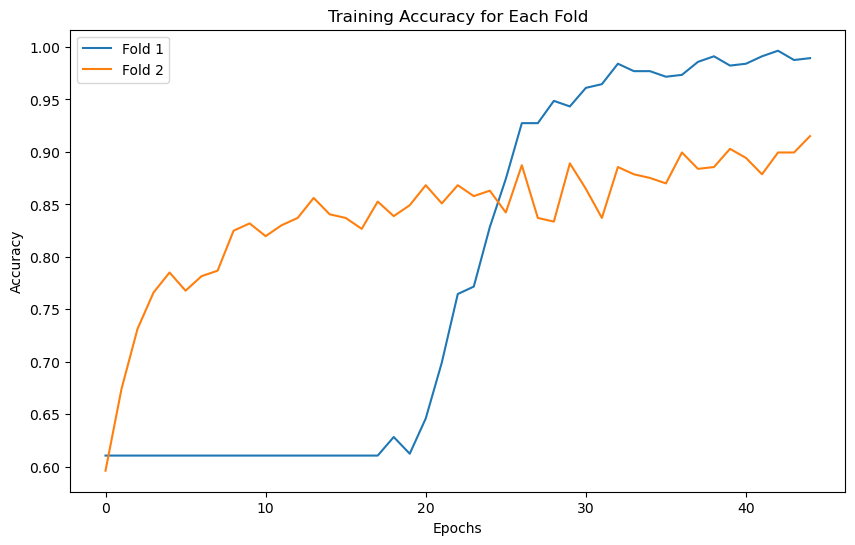

In [60]:
# Plot the training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(accuracy)):
    plt.plot(accuracy[i], label=f'Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Each Fold')
plt.legend()
plt.show()

In [29]:
c=model.evaluate(val_features,val_labels)
print(c)

8/8 [==============================] - 0s 48ms/step - loss: 0.2467 - accuracy: 0.9617
[0.2467273473739624, 0.9617021083831787]


In [30]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D,\
GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

def grumodel():
    model_r = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=((6250,19)), dropout=0.2),
        # tf.keras.layers.SimpleRNN(64, activation='relu', return_sequences=True, dropout=0.2),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])

    model_r.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_r = grumodel()
model_r.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6248, 5)           290       
                                                                 
 batch_normalization (Batch  (None, 6248, 5)           20        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6248, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 3124, 5)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3122, 5)           80        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 3122, 5)           0

In [61]:
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf = GroupKFold(n_splits=2)  # Set the number of splits (adjust as needed)
accuracy = []

model_r = grumodel()

for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    history = model.fit(train_features, train_labels, epochs=45, batch_size=96, validation_data=(val_features, val_labels))

    # Collect the accuracy for each fold
    accuracy.append(history.history['accuracy'])  # Adjust based on your metric of interest



Epoch 1/45
6/6 [==============================] - 4s 704ms/step - loss: 0.4941 - accuracy: 0.7858 - val_loss: 0.3991 - val_accuracy: 0.7955
Epoch 2/45
6/6 [==============================] - 2s 327ms/step - loss: 0.2826 - accuracy: 0.8885 - val_loss: 0.3512 - val_accuracy: 0.8735
Epoch 3/45
6/6 [==============================] - 2s 326ms/step - loss: 0.2353 - accuracy: 0.9310 - val_loss: 0.3658 - val_accuracy: 0.8735
Epoch 4/45
6/6 [==============================] - 2s 337ms/step - loss: 0.1975 - accuracy: 0.9345 - val_loss: 0.3601 - val_accuracy: 0.8769
Epoch 5/45
6/6 [==============================] - 2s 327ms/step - loss: 0.1689 - accuracy: 0.9540 - val_loss: 0.3698 - val_accuracy: 0.8579
Epoch 6/45
6/6 [==============================] - 2s 340ms/step - loss: 0.1505 - accuracy: 0.9681 - val_loss: 0.3929 - val_accuracy: 0.8371
Epoch 7/45
6/6 [==============================] - 2s 363ms/step - loss: 0.1425 - accuracy: 0.9628 - val_loss: 0.3869 - val_accuracy: 0.8406
Epoch 8/45
6/6 [====

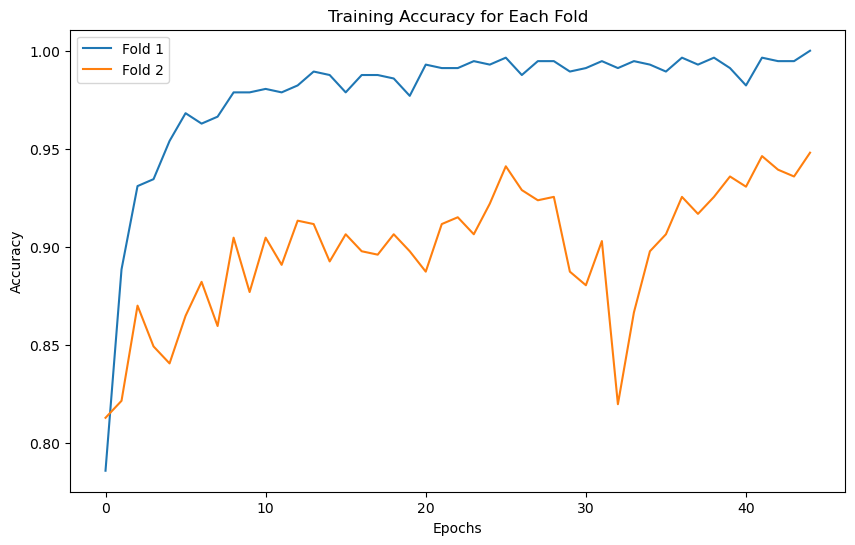

In [62]:
# Plot the training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(accuracy)):
    plt.plot(accuracy[i], label=f'Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Each Fold')
plt.legend()
plt.show()

In [37]:
d=model_r.evaluate(val_features,val_labels)
print(d)

8/8 [==============================] - 1s 56ms/step - loss: 0.6812 - accuracy: 0.8468
[0.6812399625778198, 0.8468084931373596]


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 6250, 32)          1664      
                                                                 
 dense_7 (Dense)             (None, 6250, 1)           33        
                                                                 
Total params: 1697 (6.63 KB)
Trainable params: 1697 (6.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
!! pip install pydot

['Collecting pydot',
 '  Downloading pydot-1.4.2-py2.py3-none-any.whl (21 kB)',
 'Requirement already satisfied: pyparsing>=2.1.4 in c:\\users\\dell\\anaconda3\\lib\\site-packages (from pydot) (3.0.9)',
 'Installing collected packages: pydot',
 'Successfully installed pydot-1.4.2']

In [43]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

def grumodel():
    model_r = Sequential([
        SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(6250, 19), dropout=0.2),
        Dense(1)  # Output layer for regression
    ])

    model_r.compile(optimizer='adam', loss='mean_squared_error')
    return model_r

model_r = grumodel()
model_r.summary()

# Save the visualization to a file
plot_model(model_r, to_file='gru_model.png', show_shapes=True, show_layer_names=True)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 6250, 32)          1664      
                                                                 
 dense_8 (Dense)             (None, 6250, 1)           33        
                                                                 
Total params: 1697 (6.63 KB)
Trainable params: 1697 (6.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [44]:
!! pip install pydot graphviz


['Requirement already satisfied: pydot in c:\\users\\dell\\anaconda3\\lib\\site-packages (1.4.2)',
 'Collecting graphviz',
 '  Downloading graphviz-0.20.1-py3-none-any.whl (47 kB)',
 '     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--',
 '     ---------------- --------------------- 20.5/47.0 kB 320.0 kB/s eta 0:00:01',
 '     ---------------- --------------------- 20.5/47.0 kB 320.0 kB/s eta 0:00:01',
 '     -------------------------------------- 47.0/47.0 kB 294.4 kB/s eta 0:00:00',
 'Requirement already satisfied: pyparsing>=2.1.4 in c:\\users\\dell\\anaconda3\\lib\\site-packages (from pydot) (3.0.9)',
 'Installing collected packages: graphviz',
 'Successfully installed graphviz-0.20.1']

In [48]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

def grumodel():
    model_r = Sequential([
        SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(6250, 19), dropout=0.2),
        Dense(1)  # Output layer for regression
    ])

    model_r.compile(optimizer='adam', loss='mean_squared_error')
    return model_r

model_r = grumodel()
model_r.summary()

# Display the model architecture
plot_model(model_r, show_shapes=True, show_layer_names=True)



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 6250, 32)          1664      
                                                                 
 dense_12 (Dense)            (None, 6250, 1)           33        
                                                                 
Total params: 1697 (6.63 KB)
Trainable params: 1697 (6.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming you have defined the `resenetmodel` function

gkf = GroupKFold(n_splits=6)  # Set the number of splits (adjust as needed)
accuracy = []

for fold, (train_index, val_index) in enumerate(gkf.split(data_array, label_array, groups=group_array), 1):
    train_features, train_labels = data_array[train_index], label_array[train_index]
    val_features, val_labels = data_array[val_index], label_array[val_index]

    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
    val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)

    model = resenetmodel()  # Assuming this function creates a new instance of your model

    history = model.fit(train_features, train_labels, epochs=45, batch_size=96, validation_data=(val_features, val_labels))

    # Collect the accuracy for each fold
    accuracy.append(history.history['accuracy'])  # Adjust based on your metric of interest

# Plot the training accuracy for each fold
plt.figure(figsize=(10, 6))
for i in range(len(accuracy)):
    plt.plot(accuracy[i], label=f'Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy for Each Fold')
plt.legend()
plt.show()


KeyboardInterrupt: 